# Data gathering and joining for Respiratory Diseases

## Annual Hospitalizations
Data obtained from Secretaría de Salud at: http://www.dgis.salud.gob.mx/contenidos/basesdedatos/da_egresoshosp_gobmx.html 
<br>
Years considered: 2010 to 2016. 


Every Dataset contains (among others) the following information for each individual case:
* Mexican State
* CLUES: Clave Única de Establecimientos de Salud
* Sex of the paitent
* Age of the paitent
* Main cause of medical attention



Other datasources
* [CLUES (Clave Única de Establecimientos de Salud) catalog](http://www.dgis.salud.gob.mx/contenidos/intercambio/clues_gobmx.html)
    * Information on each Hospital: Name, address, certification status, etc.
* [CIE-10 codes (Clasificación internacional de enfermedades)](http://cie10.org/index.html)
    * Catalog of disease codes in order to cross-reference to each patient disease.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
frames =[]

Data sets from 2010 to 2014 have a slightly different format than dataests from 2015-2016. For this reason, datasets were read in two different loops.
<br> 
Before contatenating the dataframes, only relevant columns were selected (CLUES, sex, age, and disease code).
<br> 
Datasets were filtered as well to keep only cases from Mexico City.

In [3]:
# Read Egresos Hospitalarios for years 2010-2014

years = ['2010', '2011', '2012', '2013', '2014']

for year in years:
    csv_path = f"../Resources/Egresos/{year}_Sectorial.csv"
    aux = pd.read_csv(csv_path)
    
    # Filter only CDMX - CEDOCVE (State Code) = 9 for Mexico City
    aux = aux.loc[aux['CEDOCVE']==9]
    
    # Keep only relevant columns
    aux = aux[['CLUES', 'SEXO', 'EDAD', 'AFECPRIN4']]
    
    # Add a column with the year for future data processing
    aux['YEAR'] = year
    
    frames.append(aux)

In [4]:
# Read Egresos Hospitalarios for years 2015-2016
years = ['2015', '2016']

for year in years:
    csv_path = f"../Resources/Egresos/{year}_Sectorial.csv"
    aux = pd.read_csv(csv_path)
    
    # Filter only CDMX - CEDOCVE (State Code) = 9 for Mexico City
    aux = aux.loc[aux['CEDOCVE']==9]
    
    # Keep only relevant columns
    aux = aux[['CLUES', 'SEXO', 'EDAD1', 'AFECPRIN4']]
    
    # Add a column with the year for future data processing
    aux['YEAR'] = year
    
    # Rename Age Column to match the other datasets
    aux = aux.rename(columns ={'EDAD1':'EDAD'})
    
    frames.append(aux)

In [5]:
# Concatenate dataframes
egresos = pd.concat(frames).reset_index(drop=True)
egresos.head()

,CLUES,SEXO,EDAD,AFECPRIN4,YEAR
0,DFSSA018166,2,35,O829,2010
1,DFSSA018166,2,19,O809,2010
2,DFSSA018166,1,0,Z038,2010
3,DFSSA018166,2,57,K37X,2010
4,DFSSA017886,2,30,O369,2010


In [6]:
egresos['YEAR'].unique()

array(['2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype=object)

In [7]:
egresos.shape

(4718962, 5)

## International Classification of Diseases

The column "AFECPRIN" corresponds to the disease code given by the International Classification of Diseases, a classification system developed by the World Health Organization. More details can be found at http://www.cie10.org/ <br>
<br>
In this classification, all respiratory diseases start with the letter "J". Dataset was filtered to contain only data on respiratory diseases.


In [8]:
#Filro por enfermedades respiratorias - empiezan con J
egresos_resp = egresos.loc[egresos["AFECPRIN4"].str.startswith("J")==True]
egresos_resp.head()

,CLUES,SEXO,EDAD,AFECPRIN4,YEAR
19,DFSSA018166,1,4,J180,2010
31,DFSSA018166,1,0,J180,2010
43,DFSSA018166,2,2,J189,2010
50,DFSSA018166,1,2,J180,2010
85,DFSSA018166,2,59,J90X,2010


In [9]:
egresos_resp.shape

(242151, 5)

## Clave Única de Establecimientos de Salud (CLUES)

The column "CLUES" corresponds to the code given by Secretaría de Salud to each Health Clinic or Hospital. The complete catalog can be found at http://www.dgis.salud.gob.mx/contenidos/intercambio/clues_gobmx.html <br>
<br>
The dataset contains (among many others) the following information for each health center:
* Name of State and City
* Name and Address of Hospital
* Coordinates of Hospital
* Type of Certification
* Start of Operation

This dataset was filtered to contain only hospitals within Mexico City, and only the columns on CLUES, Municipality (Delegación), and Coordinates were kept.


In [10]:
catalogo_hospitales_path = '../Resources/ESTABLECIMIENTO_SALUD_201902.csv'
catalogo_hospitales = pd.read_csv(catalogo_hospitales_path,encoding="UTF-8")

C:\Users\sandr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
catalogo_hospitales.head()

,CLUES,NOMBRE DE LA ENTIDAD,CLAVE DE LA ENTIDAD,NOMBRE DEL MUNICIPIO,CLAVE DEL MUNICIPIO,NOMBRE DE LA LOCALIDAD,CLAVE DE LA LOCALIDAD,NOMBRE DE LA JURISDICCION,CLAVE DE LA JURISDICCION,NOMBRE DE LA INSTITUCION,...,CLAVE ESTRATO UNIDAD,TIPO OBRA,CLAVE TIPO OBRA,HORARIO DE ATENCION,AREAS Y SERVICIOS,ULTIMO MOVIMIENTO,FECHA ULTIMO MOVIMIENTO,CERTIFICACION CSG,TIPO CERTIFICACION,VIGENCIA CERTIFICACION
0,ASDIF000011,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN
1,ASDIF000023,AGUASCALIENTES,1,COSÍO,4,COSIO,1,RINCÓN DE ROMOS,2,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN
2,ASDIF000035,AGUASCALIENTES,1,RINCÓN DE ROMOS,7,RINCON DE ROMOS,1,RINCÓN DE ROMOS,2,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN
3,ASDIF000040,AGUASCALIENTES,1,TEPEZALÁ,9,TEPEZALA,1,RINCÓN DE ROMOS,2,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN
4,ASDIF000052,AGUASCALIENTES,1,CALVILLO,3,CALVILLO,1,CALVILLO,3,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN


In [12]:
# Filter only hospitals located in Mexico City
hospitales_cdmx = catalogo_hospitales.loc[catalogo_hospitales['NOMBRE DE LA ENTIDAD']=='CIUDAD DE MEXICO']
hospitales_cdmx.head()

,CLUES,NOMBRE DE LA ENTIDAD,CLAVE DE LA ENTIDAD,NOMBRE DEL MUNICIPIO,CLAVE DEL MUNICIPIO,NOMBRE DE LA LOCALIDAD,CLAVE DE LA LOCALIDAD,NOMBRE DE LA JURISDICCION,CLAVE DE LA JURISDICCION,NOMBRE DE LA INSTITUCION,...,CLAVE ESTRATO UNIDAD,TIPO OBRA,CLAVE TIPO OBRA,HORARIO DE ATENCION,AREAS Y SERVICIOS,ULTIMO MOVIMIENTO,FECHA ULTIMO MOVIMIENTO,CERTIFICACION CSG,TIPO CERTIFICACION,VIGENCIA CERTIFICACION
6439,DFCIJ000011,CIUDAD DE MEXICO,9,VENUSTIANO CARRANZA,17,VENUSTIANO CARRANZA,1,VENUSTIANO CARRANZA,16,CENTROS DE INTEGRACION JUVENIL,...,2,NO ESPECIFICADO,6.0,"CONSULTA EXTERNA - L,M,X,J,V, DE 08:00:00 A 20...",NaN,ALTA,2018-10-16,NO CERTIFICADO,NO ESPECIFICADO,NaN
6440,DFCIJ000023,CIUDAD DE MEXICO,9,CUAUHTÉMOC,15,NO ESPECIFICADO,9999,CUAUHTÉMOC,15,CENTROS DE INTEGRACION JUVENIL,...,2,NO ESPECIFICADO,6.0,"CONSULTA EXTERNA - L,M,X,J,V, DE 08:00:00 A 19...",NaN,ALTA,2018-10-16,NO CERTIFICADO,NO ESPECIFICADO,NaN
6441,DFCIJ000035,CIUDAD DE MEXICO,9,CUAJIMALPA DE MORELOS,4,CUAJIMALPA DE MORELOS,1,CUAJIMALPA,7,CENTROS DE INTEGRACION JUVENIL,...,2,NO ESPECIFICADO,6.0,"CONSULTA EXTERNA - L,M,X,J,V, DE 08:00:00 A 16...",NaN,ALTA,2018-10-16,NO CERTIFICADO,NO ESPECIFICADO,NaN
6442,DFCIJ000040,CIUDAD DE MEXICO,9,COYOACÁN,3,COYOACAN,1,COYOACÁN,4,CENTROS DE INTEGRACION JUVENIL,...,2,NO ESPECIFICADO,6.0,"CONSULTA EXTERNA - L,M,X,J,V, DE 08:00:00 A 20...",NaN,ALTA,2018-10-16,NO CERTIFICADO,NO ESPECIFICADO,NaN
6443,DFCIJ000052,CIUDAD DE MEXICO,9,BENITO JUÁREZ,14,BENITO JUAREZ,1,BENITO JUÁREZ,14,CENTROS DE INTEGRACION JUVENIL,...,2,NO ESPECIFICADO,6.0,"CONSULTA EXTERNA - L,M,X,J,V, DE 08:00:00 A 19...",NaN,ALTA,2018-10-16,NO CERTIFICADO,NO ESPECIFICADO,NaN


In [13]:
# Find list of Municipalities (Delegaciones)
hospitales_cdmx['NOMBRE DEL MUNICIPIO'].value_counts()

IZTAPALAPA                400
GUSTAVO A. MADERO         314
CUAUHTÉMOC                311
BENITO JUÁREZ             191
ÁLVARO OBREGÓN            166
COYOACÁN                  165
TLALPAN                   161
MIGUEL HIDALGO            146
VENUSTIANO CARRANZA       132
AZCAPOTZALCO              107
XOCHIMILCO                 93
IZTACALCO                  85
TLÁHUAC                    84
LA MAGDALENA CONTRERAS     65
CUAJIMALPA DE MORELOS      56
MILPA ALTA                 49
NO ESPECIFICADO             3
Name: NOMBRE DEL MUNICIPIO, dtype: int64

In [14]:
# Keep only relevant columns: Municipality and Coordinates
hospitales_cdmx = hospitales_cdmx.loc[:,['CLUES','NOMBRE DEL MUNICIPIO','LONGITUD','LATITUD',]]
hospitales_cdmx.head()

,CLUES,NOMBRE DEL MUNICIPIO,LONGITUD,LATITUD
6439,DFCIJ000011,VENUSTIANO CARRANZA,-99.0928,19.438437
6440,DFCIJ000023,CUAUHTÉMOC,-99.1274,19.43732
6441,DFCIJ000035,CUAJIMALPA DE MORELOS,-99.2929,19.3578
6442,DFCIJ000040,COYOACÁN,-99.1555,19.357125
6443,DFCIJ000052,BENITO JUÁREZ,-99.1647,19.397184


Merge Hospitalizations dataset with CLUES dataset.
<br>
The resultin Dataframe contains CLUES code, sex, age, disease (respiratory only), year, delegación and coordinates.

In [15]:
#Merge egresos-cdmx vs. catalogo hospitales
egresos_hospital = pd.merge(egresos_resp,hospitales_cdmx,on='CLUES',how='left')

egresos_hospital.head(10)

,CLUES,SEXO,EDAD,AFECPRIN4,YEAR,NOMBRE DEL MUNICIPIO,LONGITUD,LATITUD
0,DFSSA018166,1,4,J180,2010,TLALPAN,-99.2075,19.2718
1,DFSSA018166,1,0,J180,2010,TLALPAN,-99.2075,19.2718
2,DFSSA018166,2,2,J189,2010,TLALPAN,-99.2075,19.2718
3,DFSSA018166,1,2,J180,2010,TLALPAN,-99.2075,19.2718
4,DFSSA018166,2,59,J90X,2010,TLALPAN,-99.2075,19.2718
5,DFSSA018166,2,0,J180,2010,TLALPAN,-99.2075,19.2718
6,DFSSA017886,2,92,J189,2010,ÁLVARO OBREGÓN,-99.2245,19.3614
7,DFSSA018166,2,24,J180,2010,TLALPAN,-99.2075,19.2718
8,DFSSA018166,2,1,J180,2010,TLALPAN,-99.2075,19.2718
9,DFSSA017886,2,37,J189,2010,ÁLVARO OBREGÓN,-99.2245,19.3614


In [16]:
egresos_hospital['NOMBRE DEL MUNICIPIO'].value_counts()

GUSTAVO A. MADERO         36615
IZTAPALAPA                31085
CUAUHTÉMOC                28767
AZCAPOTZALCO              28363
TLALPAN                   25898
BENITO JUÁREZ             22623
COYOACÁN                  19181
ÁLVARO OBREGÓN            15194
IZTACALCO                 14101
MIGUEL HIDALGO            11217
VENUSTIANO CARRANZA        3945
XOCHIMILCO                 2357
TLÁHUAC                    1922
MILPA ALTA                  697
CUAJIMALPA DE MORELOS       185
LA MAGDALENA CONTRERAS        1
Name: NOMBRE DEL MUNICIPIO, dtype: int64

In [17]:
egresos_hospital.shape

(242151, 8)

In [18]:
egresos_hospital.to_csv('../Resources/Egresos_CDMX_respiratorias.csv', header = True, index=False)

## Medical Emergencies

An analogous process to that of the Respiratory Hospitalizations was followed to clean data for Medical Emergencies. Data was obtained from Secretaría de Salud at: http://www.dgis.salud.gob.mx/contenidos/basesdedatos/da_urgencias_gobmx.htmlmx.html 
<br>
Years considered: 2010 to 2016. 

Every Dataset contains (among many others) the following information for each individual case:
* ID
* CLUES: Clave Única de Establecimientos de Salud
* Sex of the paitent
* Age of the paitent
* Main cause of medical attention
* Date the patient entered and left the hospital
* Type of emergency

In [19]:
frames = []

Data sets from 2010 to 2014 do not have headers, while datasets from 2015-2016 do. For this reason, datasets were read in two different loops.
<br> 
Before contatenating the dataframes, only relevant columns were selected (CLUES, sex, age, and disease code). <br>
<br>
Each annual dataset was merged with CLUES dataset used before. CLUES dataset contains only hospitals in Mexico City, therefore it filters only regional hospitals.

In [20]:
# Read Emergencies for years 2015-2016

years = ['2016', '2015']

for year in years:
    csv_path = f'../Resources/Urgencias/Urgencias_{year}/Urgencias_{year}.csv'
    aux = pd.read_csv(csv_path)

    # Keep only relevant columns
    aux[['CLUES', 'SEXO', 'EDAD', 'AFECPRIN','FECHAINGRESO']]
    
    # Merge with CLUES dataset, to keep only cases in Mexico City
    aux = pd.merge(aux,hospitales_cdmx,on='CLUES',how='inner')

    frames.append(aux)

C:\Users\sandr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,7,8,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\sandr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
# Set column names for the next datasets, which do not contain headers.
# Column names were obtained from the description of the data, from Secretaría de Salud
columns = ['ID','CLUES', 'FOLIO', 'FECHAALTA', 'EDAD', 'CVEEDAD', 'SEXO',
       'ENTRESIDENCIA', 'MUNRESIDENCIA', 'DERHAB', 'TIPOURGENCIA', 'MOTATE',
       'TIPOCAMA', 'ENVIADOA', 'MP', 'AFECPRIN', 'IRA', 'PLANEDA', 'SOBRESEDA',
       'FECHAINGRESO', 'HORASESTANCIA', 'MES_ESTADISTICO', 'HORAINIATE',
       'MININIATE', 'HORATERATE', 'MINTERATE']

In [22]:
# Create a dictionary to rename the columns on datasets from 2010-2014.
myDict = dict(zip(range(26),columns))

In [23]:
# Read Emergencies for years 2010-2014

years = ['2014','2013','2012','2011','2010']

for year in years:
    csv_path = f'../Resources/Urgencias/Urgencias_{year}/Urgencias_{year}.csv'
    aux = pd.read_csv(csv_path, sep=";", header=None)
    
    # Rename columns
    aux = aux.rename(columns=myDict)
    
    # Keep only relevant columns
    aux = aux[['CLUES', 'SEXO', 'EDAD', 'AFECPRIN','FECHAINGRESO']]
    
    # Merge with CLUES dataset, to keep only cases in Mexico City
    aux = pd.merge(aux,hospitales_cdmx,on='CLUES',how='inner')
    
    frames.append(aux)

C:\Users\sandr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (9,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\sandr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\sandr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
# Concatenate dataframes
urgencias = pd.concat(frames).reset_index(drop=True)

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [25]:
urgencias.head()

,AFECPRIN,CLUES,CVEEDAD,DERHAB,EDAD,ENTRESIDENCIA,ENVIADOA,FECHAALTA,FECHAINGRESO,FOLIO,...,MINTERATE,MOTATE,MP,MUNRESIDENCIA,NOMBRE DEL MUNICIPIO,PLANEDA,SEXO,SOBRESEDA,TIPOCAMA,TIPOURGENCIA
0,R104,DFSSA000053,3.0,0,7.0,9.0,4.0,3/21/2016,3/21/2016,2872,...,58.0,4.0,NaN,2,AZCAPOTZALCO,NaN,1.0,0.0,3.0,2.0
1,S099,DFSSA000053,3.0,0,1.0,9.0,4.0,3/21/2016,3/21/2016,2876,...,35.0,1.0,NaN,2,AZCAPOTZALCO,NaN,2.0,0.0,3.0,1.0
2,J00X,DFSSA000053,3.0,0,10.0,9.0,4.0,3/21/2016,3/21/2016,2882,...,0.0,4.0,NaN,2,AZCAPOTZALCO,NaN,2.0,0.0,3.0,2.0
3,J028,DFSSA000053,3.0,0,5.0,9.0,4.0,3/21/2016,3/21/2016,2883,...,50.0,4.0,NaN,2,AZCAPOTZALCO,NaN,2.0,0.0,3.0,2.0
4,J00X,DFSSA000053,3.0,0,1.0,9.0,4.0,3/23/2016,3/23/2016,2948,...,20.0,4.0,NaN,2,AZCAPOTZALCO,NaN,1.0,0.0,3.0,2.0


In [26]:
# Keep only relevant columns
urgencias=urgencias[['CLUES', 'SEXO', 'EDAD', 'AFECPRIN','FECHAINGRESO', 'NOMBRE DEL MUNICIPIO', 'LATITUD', 'LONGITUD']]
urgencias.head()

,CLUES,SEXO,EDAD,AFECPRIN,FECHAINGRESO,NOMBRE DEL MUNICIPIO,LATITUD,LONGITUD
0,DFSSA000053,1.0,7.0,R104,3/21/2016,AZCAPOTZALCO,19.4845,-99.1855
1,DFSSA000053,2.0,1.0,S099,3/21/2016,AZCAPOTZALCO,19.4845,-99.1855
2,DFSSA000053,2.0,10.0,J00X,3/21/2016,AZCAPOTZALCO,19.4845,-99.1855
3,DFSSA000053,2.0,5.0,J028,3/21/2016,AZCAPOTZALCO,19.4845,-99.1855
4,DFSSA000053,1.0,1.0,J00X,3/23/2016,AZCAPOTZALCO,19.4845,-99.1855


In [27]:
urgencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6339173 entries, 0 to 6339172
Data columns (total 8 columns):
CLUES                   object
SEXO                    float64
EDAD                    float64
AFECPRIN                object
FECHAINGRESO            object
NOMBRE DEL MUNICIPIO    object
LATITUD                 object
LONGITUD                object
dtypes: float64(2), object(6)
memory usage: 386.9+ MB


In [28]:
urgencias.shape

(6339173, 8)

In [29]:
urgencias.count()

CLUES                   6339173
SEXO                    6339173
EDAD                    6339173
AFECPRIN                4993344
FECHAINGRESO            6315988
NOMBRE DEL MUNICIPIO    6339173
LATITUD                 6339173
LONGITUD                6339173
dtype: int64

### Filter only respiratory diseases
As mentioned in previous section, the column "AFECPRIN" corresponds to the disease code given by the International Classification of Diseases, a classification system developed by the World Health Organization. More details can be found at http://www.cie10.org/ <br>
<br>
In this classification, all respiratory diseases start with the letter "J". Dataset was filtered to contain only data on respiratory diseases.

In [30]:
urgencias_resp = urgencias.loc[urgencias["AFECPRIN"].str.startswith("J")==True]
urgencias_resp.head(10)

,CLUES,SEXO,EDAD,AFECPRIN,FECHAINGRESO,NOMBRE DEL MUNICIPIO,LATITUD,LONGITUD
2,DFSSA000053,2.0,10.0,J00X,3/21/2016,AZCAPOTZALCO,19.4845,-99.1855
3,DFSSA000053,2.0,5.0,J028,3/21/2016,AZCAPOTZALCO,19.4845,-99.1855
4,DFSSA000053,1.0,1.0,J00X,3/23/2016,AZCAPOTZALCO,19.4845,-99.1855
5,DFSSA000053,1.0,1.0,J459,11/21/2016,AZCAPOTZALCO,19.4845,-99.1855
7,DFSSA000053,2.0,4.0,J028,3/22/2016,AZCAPOTZALCO,19.4845,-99.1855
8,DFSSA000053,2.0,13.0,J00X,3/21/2016,AZCAPOTZALCO,19.4845,-99.1855
9,DFSSA000053,1.0,1.0,J028,3/22/2016,AZCAPOTZALCO,19.4845,-99.1855
11,DFSSA000053,2.0,12.0,J029,6/13/2016,AZCAPOTZALCO,19.4845,-99.1855
16,DFSSA000053,1.0,2.0,J042,12/26/2015,AZCAPOTZALCO,19.4845,-99.1855
17,DFSSA000053,1.0,1.0,J068,1/1/2017,AZCAPOTZALCO,19.4845,-99.1855


In [31]:
urgencias_resp["AFECPRIN"].nunique()

222

In [32]:
urgencias_resp.shape

(649702, 8)

In [33]:
urgencias_resp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649702 entries, 2 to 4868062
Data columns (total 8 columns):
CLUES                   649702 non-null object
SEXO                    649702 non-null float64
EDAD                    649702 non-null float64
AFECPRIN                649702 non-null object
FECHAINGRESO            649386 non-null object
NOMBRE DEL MUNICIPIO    649702 non-null object
LATITUD                 649702 non-null object
LONGITUD                649702 non-null object
dtypes: float64(2), object(6)
memory usage: 44.6+ MB


In [34]:
urgencias_resp.dropna(how='any')
urgencias_resp.head()

,CLUES,SEXO,EDAD,AFECPRIN,FECHAINGRESO,NOMBRE DEL MUNICIPIO,LATITUD,LONGITUD
2,DFSSA000053,2.0,10.0,J00X,3/21/2016,AZCAPOTZALCO,19.4845,-99.1855
3,DFSSA000053,2.0,5.0,J028,3/21/2016,AZCAPOTZALCO,19.4845,-99.1855
4,DFSSA000053,1.0,1.0,J00X,3/23/2016,AZCAPOTZALCO,19.4845,-99.1855
5,DFSSA000053,1.0,1.0,J459,11/21/2016,AZCAPOTZALCO,19.4845,-99.1855
7,DFSSA000053,2.0,4.0,J028,3/22/2016,AZCAPOTZALCO,19.4845,-99.1855


In [35]:
urgencias_resp['AFECPRIN'].nunique()

222

In [36]:
urgencias_resp['NOMBRE DEL MUNICIPIO'].value_counts()

GUSTAVO A. MADERO         107782
IZTAPALAPA                 81406
CUAUHTÉMOC                 78136
TLALPAN                    56784
MIGUEL HIDALGO             55500
AZCAPOTZALCO               51487
IZTACALCO                  50647
VENUSTIANO CARRANZA        45524
XOCHIMILCO                 33941
COYOACÁN                   27989
TLÁHUAC                    27259
ÁLVARO OBREGÓN             12696
MILPA ALTA                  9774
BENITO JUÁREZ               5260
LA MAGDALENA CONTRERAS      4646
CUAJIMALPA DE MORELOS        871
Name: NOMBRE DEL MUNICIPIO, dtype: int64

In [37]:
urgencias_resp.to_csv('../Resources/Urgencias_CDMX_respiratorias.csv', header = True, index=False)

In [38]:
urgencias = pd.read_csv('../Resources/Urgencias_CDMX_respiratorias.csv')
urgencias.head()

,CLUES,SEXO,EDAD,AFECPRIN,FECHAINGRESO,NOMBRE DEL MUNICIPIO,LATITUD,LONGITUD
0,DFSSA000053,2.0,10.0,J00X,3/21/2016,AZCAPOTZALCO,19.484515,-99.185456
1,DFSSA000053,2.0,5.0,J028,3/21/2016,AZCAPOTZALCO,19.484515,-99.185456
2,DFSSA000053,1.0,1.0,J00X,3/23/2016,AZCAPOTZALCO,19.484515,-99.185456
3,DFSSA000053,1.0,1.0,J459,11/21/2016,AZCAPOTZALCO,19.484515,-99.185456
4,DFSSA000053,2.0,4.0,J028,3/22/2016,AZCAPOTZALCO,19.484515,-99.185456


***

## Cleaning date format

**DATES**. <br>
There are two date formats in the dataset: "MM/DD/YYYY" and "YYYY-MM-DD 00:00:00". Next section is to clean dates.

In [39]:
urgencias.shape

(649702, 8)

In [40]:
date = urgencias['FECHAINGRESO'].str.split(" ", expand=True)
urgencias['TIME'] = date[1]
urgencias['DATE'] = date[0]
urgencias.head()

,CLUES,SEXO,EDAD,AFECPRIN,FECHAINGRESO,NOMBRE DEL MUNICIPIO,LATITUD,LONGITUD,TIME,DATE
0,DFSSA000053,2.0,10.0,J00X,3/21/2016,AZCAPOTZALCO,19.484515,-99.185456,None,3/21/2016
1,DFSSA000053,2.0,5.0,J028,3/21/2016,AZCAPOTZALCO,19.484515,-99.185456,None,3/21/2016
2,DFSSA000053,1.0,1.0,J00X,3/23/2016,AZCAPOTZALCO,19.484515,-99.185456,None,3/23/2016
3,DFSSA000053,1.0,1.0,J459,11/21/2016,AZCAPOTZALCO,19.484515,-99.185456,None,11/21/2016
4,DFSSA000053,2.0,4.0,J028,3/22/2016,AZCAPOTZALCO,19.484515,-99.185456,None,3/22/2016


Dataframe was separated into two, one with each date format.

In [41]:
urgencias2 = urgencias.loc[pd.notnull(urgencias['TIME'])]   # Date format
urgencias1 = urgencias.loc[pd.isnull(urgencias['TIME'])]    # "MM/DD/YYYY" string format

In [42]:
urgencias1.shape

(115807, 10)

In [43]:
urgencias2.shape

(533895, 10)

In [44]:
date1 = urgencias1['DATE'].str.split("/", expand=True)
date2 = urgencias2['DATE'].str.split("-", expand=True)

In [45]:
date1.head(2)

,0,1,2
0,3,21,2016
1,3,21,2016


In [46]:
urgencias1['YYYY']=date1[2]
urgencias1['MM']=date1[0]
urgencias1['DD']=date1[1]
urgencias1 = urgencias1[['CLUES', 'SEXO', 'EDAD', 'AFECPRIN', 'NOMBRE DEL MUNICIPIO', 'LATITUD', 'LONGITUD', 'YYYY', 'MM', 'DD']]
urgencias1.head()

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,CLUES,SEXO,EDAD,AFECPRIN,NOMBRE DEL MUNICIPIO,LATITUD,LONGITUD,YYYY,MM,DD
0,DFSSA000053,2.0,10.0,J00X,AZCAPOTZALCO,19.484515,-99.185456,2016,3,21
1,DFSSA000053,2.0,5.0,J028,AZCAPOTZALCO,19.484515,-99.185456,2016,3,21
2,DFSSA000053,1.0,1.0,J00X,AZCAPOTZALCO,19.484515,-99.185456,2016,3,23
3,DFSSA000053,1.0,1.0,J459,AZCAPOTZALCO,19.484515,-99.185456,2016,11,21
4,DFSSA000053,2.0,4.0,J028,AZCAPOTZALCO,19.484515,-99.185456,2016,3,22


In [47]:
date2.head(2)

,0,1,2
115491,2015,06,28
115492,2015,06,28


In [48]:
urgencias2['YYYY']=date2[0]
urgencias2['MM']=date2[1]
urgencias2['DD']=date2[2]
urgencias2 = urgencias2[['CLUES', 'SEXO', 'EDAD', 'AFECPRIN', 'NOMBRE DEL MUNICIPIO', 'LATITUD', 'LONGITUD', 'YYYY', 'MM', 'DD']]
urgencias2.head()

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,CLUES,SEXO,EDAD,AFECPRIN,NOMBRE DEL MUNICIPIO,LATITUD,LONGITUD,YYYY,MM,DD
115491,DFSSA017886,2.0,37.0,J42X,ÁLVARO OBREGÓN,19.361409,-99.224515,2015,06,28
115492,DFSSA017886,1.0,32.0,J029,ÁLVARO OBREGÓN,19.361409,-99.224515,2015,06,28
115493,DFSSA017886,1.0,32.0,J029,ÁLVARO OBREGÓN,19.361409,-99.224515,2015,06,28
115494,DFSSA017886,2.0,33.0,J029,ÁLVARO OBREGÓN,19.361409,-99.224515,2015,06,28
115495,DFSSA017886,1.0,58.0,J029,ÁLVARO OBREGÓN,19.361409,-99.224515,2015,06,28


Two datasets are joined again into a single Emergencies dataset.

In [49]:
# Rejoin two sets into one
urgencias = pd.concat([urgencias1, urgencias2])
urgencias.head()

,CLUES,SEXO,EDAD,AFECPRIN,NOMBRE DEL MUNICIPIO,LATITUD,LONGITUD,YYYY,MM,DD
0,DFSSA000053,2.0,10.0,J00X,AZCAPOTZALCO,19.484515,-99.185456,2016,3,21
1,DFSSA000053,2.0,5.0,J028,AZCAPOTZALCO,19.484515,-99.185456,2016,3,21
2,DFSSA000053,1.0,1.0,J00X,AZCAPOTZALCO,19.484515,-99.185456,2016,3,23
3,DFSSA000053,1.0,1.0,J459,AZCAPOTZALCO,19.484515,-99.185456,2016,11,21
4,DFSSA000053,2.0,4.0,J028,AZCAPOTZALCO,19.484515,-99.185456,2016,3,22


<br>
<br>For an unknown reason, some data points for other years was imported. Since that data is not complete, only years 2011-2016 will be kept.

In [50]:
urgencias['YYYY'].unique()

array(['2016', '2015', '2017', '2006', nan, '2014', '2013', '2012',
       '2011'], dtype=object)

In [51]:
urgencias['YYYY'].value_counts()

2014    144636
2012    137381
2013    135752
2015    115676
2016    105784
2017      7773
2011      2383
2006         1
Name: YYYY, dtype: int64

In [52]:
urgencias = urgencias.loc[urgencias['YYYY']!= '2006']
urgencias = urgencias.loc[urgencias['YYYY']!= '2017']
urgencias = urgencias.loc[pd.notnull(urgencias['YYYY'])]

In [53]:
urgencias['YYYY'].unique()

array(['2016', '2015', '2014', '2013', '2012', '2011'], dtype=object)

In [54]:
urgencias.shape

(641612, 10)

In [55]:
urgencias.dtypes

CLUES                    object
SEXO                    float64
EDAD                    float64
AFECPRIN                 object
NOMBRE DEL MUNICIPIO     object
LATITUD                 float64
LONGITUD                float64
YYYY                     object
MM                       object
DD                       object
dtype: object

In [56]:
urgencias.head()

,CLUES,SEXO,EDAD,AFECPRIN,NOMBRE DEL MUNICIPIO,LATITUD,LONGITUD,YYYY,MM,DD
0,DFSSA000053,2.0,10.0,J00X,AZCAPOTZALCO,19.484515,-99.185456,2016,3,21
1,DFSSA000053,2.0,5.0,J028,AZCAPOTZALCO,19.484515,-99.185456,2016,3,21
2,DFSSA000053,1.0,1.0,J00X,AZCAPOTZALCO,19.484515,-99.185456,2016,3,23
3,DFSSA000053,1.0,1.0,J459,AZCAPOTZALCO,19.484515,-99.185456,2016,11,21
4,DFSSA000053,2.0,4.0,J028,AZCAPOTZALCO,19.484515,-99.185456,2016,3,22


Return to datetime format

In [57]:
urgencias['date'] = urgencias['YYYY'] +"-"+ urgencias['MM'] +"-"+ urgencias['DD']
urgencias['date'] = pd.to_datetime(urgencias['date'])
urgencias = urgencias[['CLUES', 'SEXO', 'EDAD', 'AFECPRIN', 'NOMBRE DEL MUNICIPIO', 'LATITUD', 'LONGITUD', 'date']]
urgencias.head()

,CLUES,SEXO,EDAD,AFECPRIN,NOMBRE DEL MUNICIPIO,LATITUD,LONGITUD,date
0,DFSSA000053,2.0,10.0,J00X,AZCAPOTZALCO,19.484515,-99.185456,2016-03-21
1,DFSSA000053,2.0,5.0,J028,AZCAPOTZALCO,19.484515,-99.185456,2016-03-21
2,DFSSA000053,1.0,1.0,J00X,AZCAPOTZALCO,19.484515,-99.185456,2016-03-23
3,DFSSA000053,1.0,1.0,J459,AZCAPOTZALCO,19.484515,-99.185456,2016-11-21
4,DFSSA000053,2.0,4.0,J028,AZCAPOTZALCO,19.484515,-99.185456,2016-03-22


In [58]:
urgencias.dtypes

CLUES                           object
SEXO                           float64
EDAD                           float64
AFECPRIN                        object
NOMBRE DEL MUNICIPIO            object
LATITUD                        float64
LONGITUD                       float64
date                    datetime64[ns]
dtype: object

In [59]:
urgencias.to_csv('../Resources/Urgencias_CDMX_respiratorias_date-corrected.csv')

***

### Extract general information about municipalities

In [60]:
delegaciones = pd.read_csv('../Resources/delegaciones.csv')
delegaciones = delegaciones.set_index('DELEGACIÓN')
delegaciones

,ABREV,POBLACIÓN,SUPERFICIE (KM2),DENSIDAD (HAB7KM2)
DELEGACIÓN,,,,
ÁLVARO OBREGÓN,AO,749982,96.17,7799
AZCAPOTZALCO,AZC,400161,33.66,11888
BENITO JUÁREZ,BJ,417416,26.63,15675
COYOACÁN,COY,608479,54.40,11185
CUAJIMALPA DE MORELOS,CUAJ,199224,74.58,2671
CUAUHTÉMOC,CUAH,532553,32.40,16437
GUSTAVO A. MADERO,GAM,1164477,94.07,12379
IZTACALCO,IZC,390348,23.30,16753
IZTAPALAPA,IZT,1827868,117.00,15623


In [61]:
urgencias['NOMBRE DEL MUNICIPIO'].unique()

array(['AZCAPOTZALCO', 'COYOACÁN', 'GUSTAVO A. MADERO', 'IZTACALCO',
       'IZTAPALAPA', 'LA MAGDALENA CONTRERAS', 'MILPA ALTA', 'TLÁHUAC',
       'TLALPAN', 'XOCHIMILCO', 'BENITO JUÁREZ', 'CUAUHTÉMOC',
       'MIGUEL HIDALGO', 'VENUSTIANO CARRANZA', 'ÁLVARO OBREGÓN',
       'CUAJIMALPA DE MORELOS'], dtype=object)

***

## Apply some filters if desired before graphing

### Filter by Municipality


In [62]:
delegacion = 'TLALPAN'
urgencias_filtered = urgencias.loc[urgencias['NOMBRE DEL MUNICIPIO']==delegacion]

### Filter by Age group - Children

In [63]:
max_age = 12
urgencias_filtered = urgencias.loc[urgencias['EDAD']<=max_age]

### Filter by Age group - Elderly

In [64]:
min_age = 60
urgencias_filtered = urgencias.loc[urgencias['EDAD']>=min_age]

### Filter by Specific Respiratory Disease

In [65]:
# First letters of disease code
code = "J45" # Example for asma
urgencias_filtered = urgencias.loc[urgencias['AFECPRIN'].str.startswith(code)==True]

***

## Time series with filtered data

In [66]:
# ----------------------------------------------- #
# Only in case no filters were previously applied #
# ----------------------------------------------- #
urgencias_filtered = urgencias

***

Select Municipality, in order to divide number of disease cases by entire population.<br>
<br>
Write "TOTAL" if for the whole city


In [67]:
municipality = 'TOTAL'
population_in_area = delegaciones['POBLACIÓN'][municipality]
population_in_area

8918653

In [68]:
# Present data as Number of cases per 100K
num_to_divide = 100000
population_per_100k = population_in_area/num_to_divide
population_per_100k

89.18653

In [69]:
urgencias_sorted = urgencias_filtered.groupby('date')['AFECPRIN'].count().reset_index()
# urgencias_sorted = urgencias_sorted.reset_index()
urgencias_sorted = urgencias_sorted.rename(columns={'AFECPRIN':'Cases'})
urgencias_sorted['Cases'] = urgencias_sorted['Cases']/population_per_100k

urgencias_sorted.head()


,date,Cases
0,2011-12-25,0.011212
1,2011-12-26,5.124092
2,2011-12-27,5.101667
3,2011-12-28,5.000755
4,2011-12-29,4.664381


***
Calculate a Moving Average of 7 days.

In [70]:
urgencias_sorted['MA'] = urgencias_sorted['Cases'].rolling(7).mean()

In [71]:
urgencias_sorted.head(10)

,date,Cases,MA
0,2011-12-25,0.011212,NaN
1,2011-12-26,5.124092,NaN
2,2011-12-27,5.101667,NaN
3,2011-12-28,5.000755,NaN
4,2011-12-29,4.664381,NaN
5,2011-12-30,4.350433,NaN
6,2011-12-31,2.466740,3.817040
7,2012-01-01,3.363737,4.295972
8,2012-01-02,4.552257,4.214281
9,2012-01-03,4.384070,4.111768


***


## Graph a time series

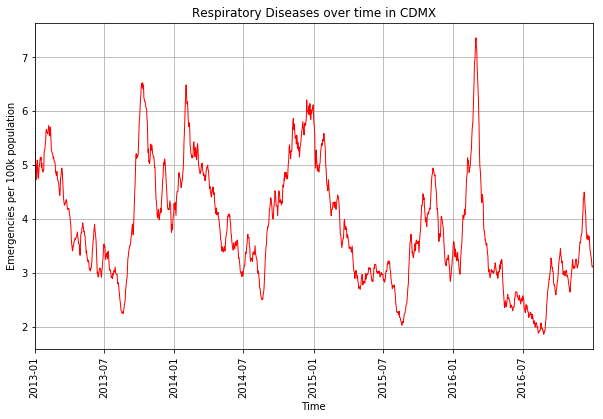

In [72]:
plt.figure(figsize =(10,6))

plt.title("Respiratory Diseases over time in CDMX")
plt.xlabel("Time")
plt.ylabel("Emergencies per 100k population")

# Add in a grid for the chart
plt.grid()

respiratory, = plt.plot(urgencias_sorted['date'], urgencias_sorted['MA'], color='red', linewidth=1, label='Cases per 100k')

# Set x and y limits
plt.xlim('2013-01-01', '2016-12-31')
plt.xticks(rotation=90)

# Create a handle for each plot


# Set our legend to where the chart thinks is best
# plt.legend(handles=[fahrenheit, celcius], loc="best")

plt.savefig("../Images/diseases_CDMX_all_respiratory.png")
plt.show()

***
### Create a summary of Total Respiratory Diseases and Total Number of Emergencies en every Municipality

In [73]:
delegaciones['ABREV'].keys()

Index(['ÁLVARO OBREGÓN', 'AZCAPOTZALCO', 'BENITO JUÁREZ', 'COYOACÁN',
       'CUAJIMALPA DE MORELOS', 'CUAUHTÉMOC', 'GUSTAVO A. MADERO', 'IZTACALCO',
       'IZTAPALAPA', 'LA MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'MILPA ALTA',
       'TLÁHUAC', 'TLALPAN', 'VENUSTIANO CARRANZA', 'XOCHIMILCO', 'TOTAL'],
      dtype='object', name='DELEGACIÓN')

In [74]:
municipalities = ['ÁLVARO OBREGÓN', 'AZCAPOTZALCO', 'BENITO JUÁREZ', 
                  'COYOACÁN', 'CUAJIMALPA DE MORELOS', 'CUAUHTÉMOC', 
                  'GUSTAVO A. MADERO', 'IZTACALCO', 'IZTAPALAPA', 
                  'LA MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'MILPA ALTA', 
                  'TLÁHUAC', 'TLALPAN', 'VENUSTIANO CARRANZA', 'XOCHIMILCO', 'TOTAL']

For Child Asthma

In [75]:
delegacion = 'TLALPAN' # Usar 'TOTAL' para toda la CDMX
code = "J45"
num_to_divide = 100000 # For example, for every 100,000 hab
max_age = 18 

In [76]:
urgencias['date'].nunique()

1834

Repeat for every municipality:

In [120]:
population_per_100k = delegaciones['POBLACIÓN'][delegacion]/num_to_divide

#Child asthma
urgencias_asma = urgencias.loc[urgencias['NOMBRE DEL MUNICIPIO']==delegacion] \
    .loc[urgencias['AFECPRIN'].str.startswith(code)==True] \
    .loc[urgencias['EDAD']<=max_age] \
    .groupby('date')['AFECPRIN'] \
    .count().reset_index().rename(columns={'AFECPRIN':'Cases'}) 
urgencias_asma[f'ASMA/100k_{delegacion}'] = urgencias_sorted['Cases']/population_per_100k
urgencias_asma = urgencias_asma[['date', f'ASMA/100k_{delegacion}']]

# Total Emergencies
urgencias_tot = urgencias.loc[urgencias['NOMBRE DEL MUNICIPIO']==delegacion] \
    .groupby('date')['AFECPRIN'].count() \
    .reset_index().rename(columns={'AFECPRIN':'Cases'}) 
urgencias_tot[f'Cases/100k_{delegacion}'] = urgencias_tot['Cases']/population_per_100k
urgencias_tot = urgencias_tot[['date', f'Cases/100k_{delegacion}']]

urgencias_TOTAL = pd.merge(urgencias_tot, urgencias_asma, on='date', how='outer')

urgencias_TOTAL.to_csv(f'../Resources/Urgencias_{delegacion}.csv')

In [181]:
#TOTAL
population_per_100k = delegaciones['POBLACIÓN'][delegacion]/num_to_divide

#Child asthma
urgencias_asma = urgencias.loc[urgencias['AFECPRIN'].str.startswith(code)==True] \
    .loc[urgencias['EDAD']<=max_age] \
    .groupby('date')['AFECPRIN'] \
    .count().reset_index().rename(columns={'AFECPRIN':'Cases'}) 
urgencias_asma[f'ASMA/100k_{delegacion}'] = urgencias_sorted['Cases']/population_per_100k
urgencias_asma = urgencias_asma[['date', f'ASMA/100k_{delegacion}']]

# Total Emergencies
urgencias_tot = urgencias.groupby('date')['AFECPRIN'].count() \
    .reset_index().rename(columns={'AFECPRIN':'Cases'}) 
urgencias_tot[f'Cases/100k_{delegacion}'] = urgencias_tot['Cases']/population_per_100k
urgencias_tot = urgencias_tot[['date', f'Cases/100k_{delegacion}']]

urgencias_TOTAL = pd.merge(urgencias_tot, urgencias_asma, on='date', how='outer')

urgencias_TOTAL.to_csv(f'../Resources/Urgencias_{delegacion}.csv')

In [182]:
urgencias_TOTAL['date'] = str(urgencias_TOTAL['date'])

In [183]:
urgencias_OBREGON = pd.read_csv('../Resources/Urgencias_ÁLVARO OBREGÓN.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_AZCAPOTZALCO = pd.read_csv('../Resources/Urgencias_AZCAPOTZALCO.csv', usecols=[1,2,3], encoding='UTF-8')
urgencias_BENITOJUAREZ = pd.read_csv('../Resources/Urgencias_BENITO JUÁREZ.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_COYOACAN = pd.read_csv('../Resources/Urgencias_COYOACÁN.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_CUAJIMALPA = pd.read_csv('../Resources/Urgencias_CUAJIMALPA DE MORELOS.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_CUAUHTEMOC = pd.read_csv('../Resources/Urgencias_CUAUHTÉMOC.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_GAM = pd.read_csv('../Resources/Urgencias_GUSTAVO A. MADERO.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_IZTACALCO = pd.read_csv('../Resources/Urgencias_IZTACALCO.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_IZTAPALAPA = pd.read_csv('../Resources/Urgencias_IZTAPALAPA.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_MAGDALENACONTRERAS = pd.read_csv('../Resources/Urgencias_LA MAGDALENA CONTRERAS.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_MIGUELHIDALGO = pd.read_csv('../Resources/Urgencias_MIGUEL HIDALGO.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_MILPAALTA = pd.read_csv('../Resources/Urgencias_MILPA ALTA.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_TLAHUAC = pd.read_csv('../Resources/Urgencias_TLÁHUAC.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_TLALPAN = pd.read_csv('../Resources/Urgencias_TLALPAN.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_VENUSTIANO = pd.read_csv('../Resources/Urgencias_VENUSTIANO CARRANZA.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_XOCHIMILCO = pd.read_csv('../Resources/Urgencias_XOCHIMILCO.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')
urgencias_TOTAL = pd.read_csv('../Resources/Urgencias_TOTAL.csv', engine='python', usecols=[1,2,3], encoding='UTF-8')

In [185]:
summary1 = pd.merge(urgencias_OBREGON, urgencias_AZCAPOTZALCO, on='date', how='outer')
summary2 = pd.merge(urgencias_BENITOJUAREZ, urgencias_COYOACAN , on='date', how='outer')
summary3 = pd.merge(urgencias_CUAJIMALPA, urgencias_CUAUHTEMOC , on='date', how='outer')
summary4 = pd.merge(urgencias_GAM, urgencias_IZTACALCO , on='date', how='outer')
summary5 = pd.merge(urgencias_IZTAPALAPA, urgencias_MAGDALENACONTRERAS , on='date', how='outer')
summary6 = pd.merge(urgencias_MIGUELHIDALGO, urgencias_MILPAALTA , on='date', how='outer')
summary7 = pd.merge(urgencias_TLAHUAC, urgencias_TLALPAN , on='date', how='outer')
summary8 = pd.merge(urgencias_VENUSTIANO, urgencias_XOCHIMILCO , on='date', how='outer')


summary10 = pd.merge(summary1, summary2 , on='date', how='outer')
summary11 = pd.merge(summary3, summary4 , on='date', how='outer')
summary12 = pd.merge(summary5, summary6 , on='date', how='outer')
summary13 = pd.merge(summary7, summary8 , on='date', how='outer')

summary20 = pd.merge(summary10, summary11 , on='date', how='outer')
summary21 = pd.merge(summary12, summary13 , on='date', how='outer')

summary30 = pd.merge(summary20, summary21 , on='date', how='outer')
summary = pd.merge(summary30, urgencias_TOTAL , on='date', how='outer')

In [186]:
summary.columns

Index(['date', 'Cases/100k_ÁLVARO OBREGÓN', 'ASMA/100k_ÁLVARO OBREGÓN',
       'Cases/100k_AZCAPOTZALCO', 'ASMA/100k_AZCAPOTZALCO',
       'Cases/100k_BENITO JUÁREZ', 'ASMA/100k_BENITO JUÁREZ',
       'Cases/100k_COYOACÁN', 'ASMA/100k_COYOACÁN',
       'Cases/100k_CUAJIMALPA DE MORELOS', 'ASMA/100k_CUAJIMALPA DE MORELOS',
       'Cases/100k_CUAUHTÉMOC', 'ASMA/100k_CUAUHTÉMOC',
       'Cases/100k_GUSTAVO A. MADERO', 'ASMA/100k_GUSTAVO A. MADERO',
       'Cases/100k_IZTACALCO', 'ASMA/100k_IZTACALCO', 'Cases/100k_IZTAPALAPA',
       'ASMA/100k_IZTAPALAPA', 'Cases/100k_LA MAGDALENA CONTRERAS',
       'ASMA/100k_LA MAGDALENA CONTRERAS', 'Cases/100k_MIGUEL HIDALGO',
       'ASMA/100k_MIGUEL HIDALGO', 'Cases/100k_MILPA ALTA',
       'ASMA/100k_MILPA ALTA', 'Cases/100k_TLÁHUAC', 'ASMA/100k_TLÁHUAC',
       'Cases/100k_TLALPAN', 'ASMA/100k_TLALPAN',
       'Cases/100k_VENUSTIANO CARRANZA', 'ASMA/100k_VENUSTIANO CARRANZA',
       'Cases/100k_XOCHIMILCO', 'ASMA/100k_XOCHIMILCO', 'Cases/100k_TOTAL

In [187]:
summary.to_csv('../Resources/urgencias_asma-inf_por_delegacion.csv', encoding='UTF-8')

In [ ]:
summary = pd.read_csv('../Resources/urgencias_asma-inf_por_delegacion.csv')